In [1]:
!pip install opencv-python==4.4.0.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


In [2]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pytesseract
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [4]:
print(cv2.__version__)

4.4.0


In [5]:
images_dir = "/content/drive/MyDrive/archive"
image_files = os.listdir(images_dir)

In [6]:
image_path = "{}/{}".format(images_dir, "/content/drive/MyDrive/archive")

In [7]:
img = cv2.imread('/content/drive/MyDrive/archive/download.jpeg')

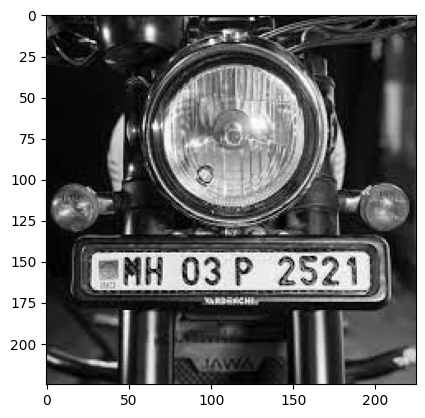

In [8]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [9]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

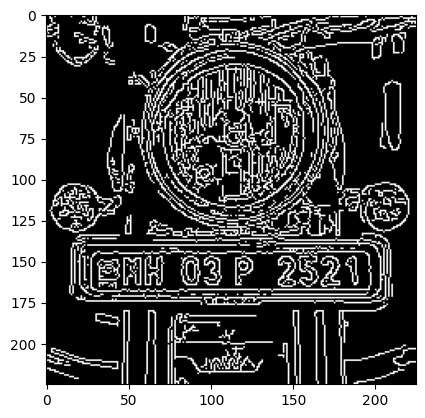

In [10]:
bfilter = cv2.bilateralFilter(gray, 20, 20, 20) #noise reduction
edged = cv2.Canny(bfilter, 30, 150) #edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

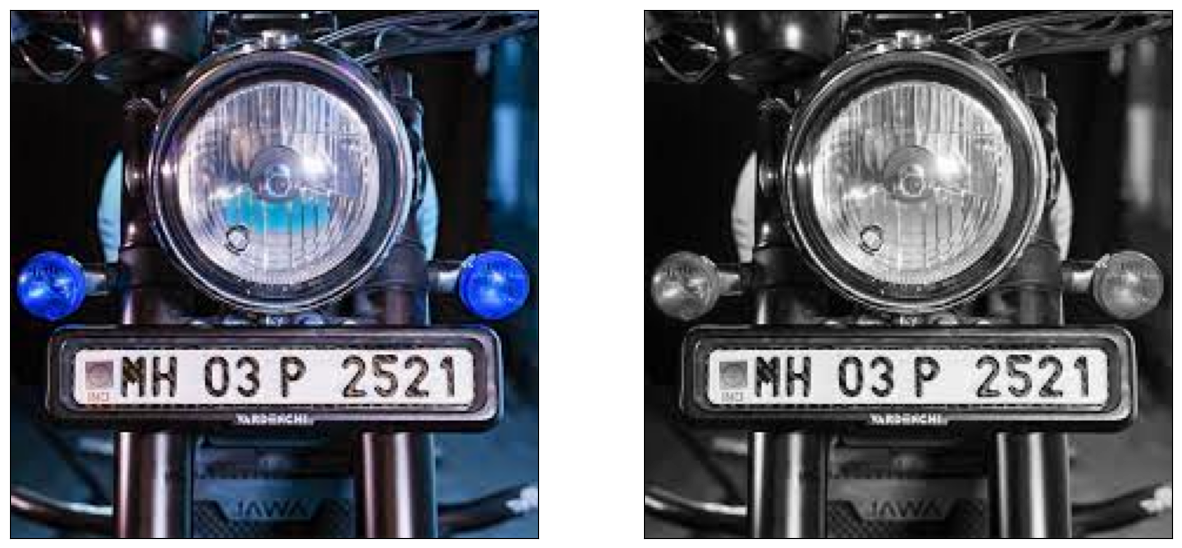

In [11]:
plot_images(img, gray)

In [12]:
blur = cv2.bilateralFilter(gray, 20,9, 10)

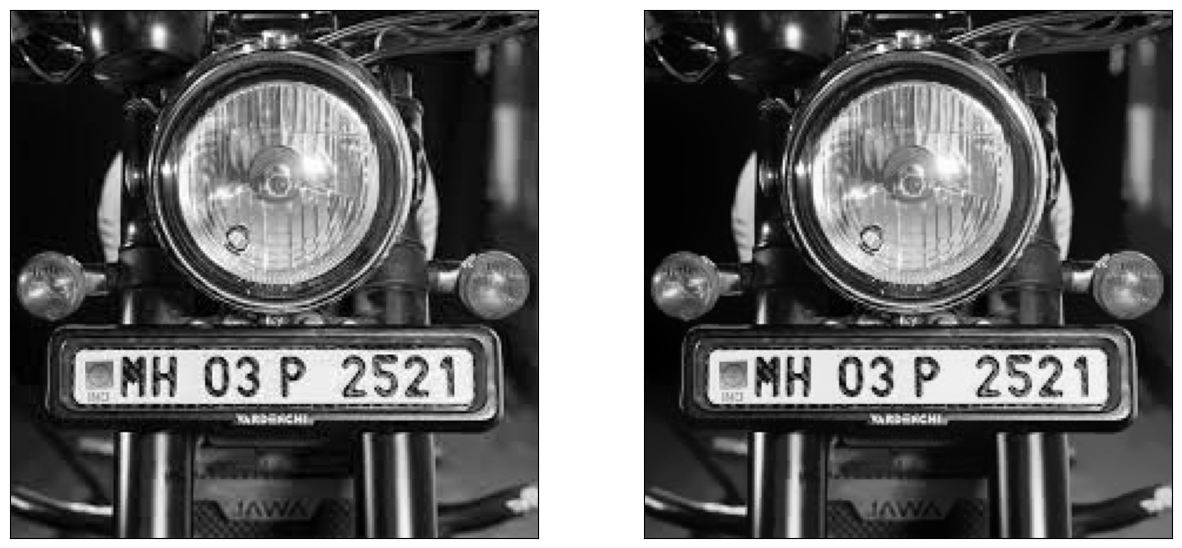

In [13]:
plot_images(gray, blur)

In [14]:
edges = cv2.Canny(blur, 30, 150)

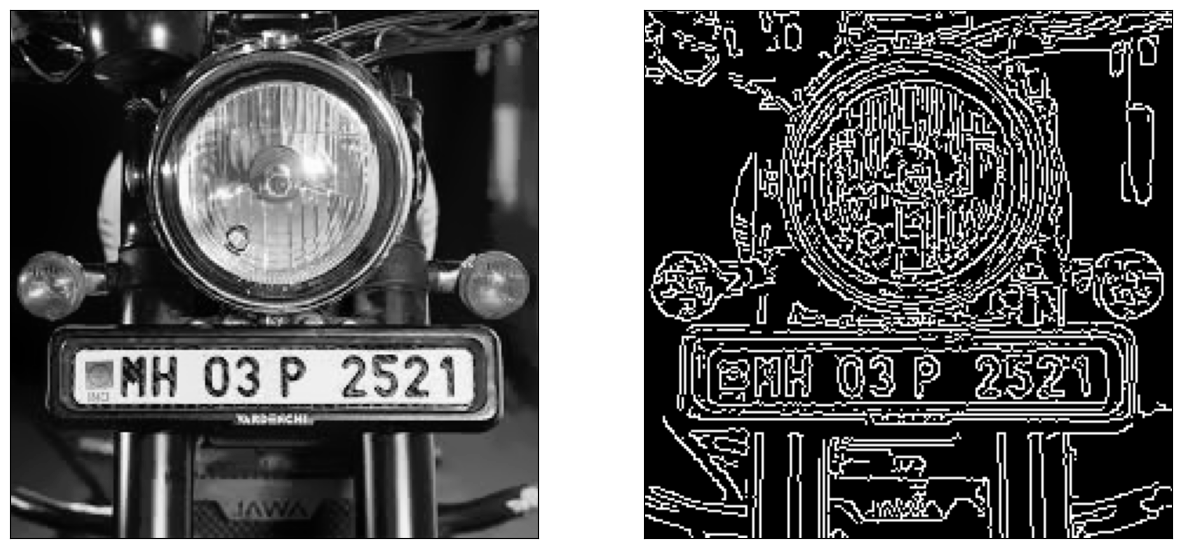

In [15]:
plot_images(blur, edges)

In [16]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
image_copy = img.copy()

In [18]:
_ = cv2.drawContours(image_copy, cnts, -1, (100,0,250),2)

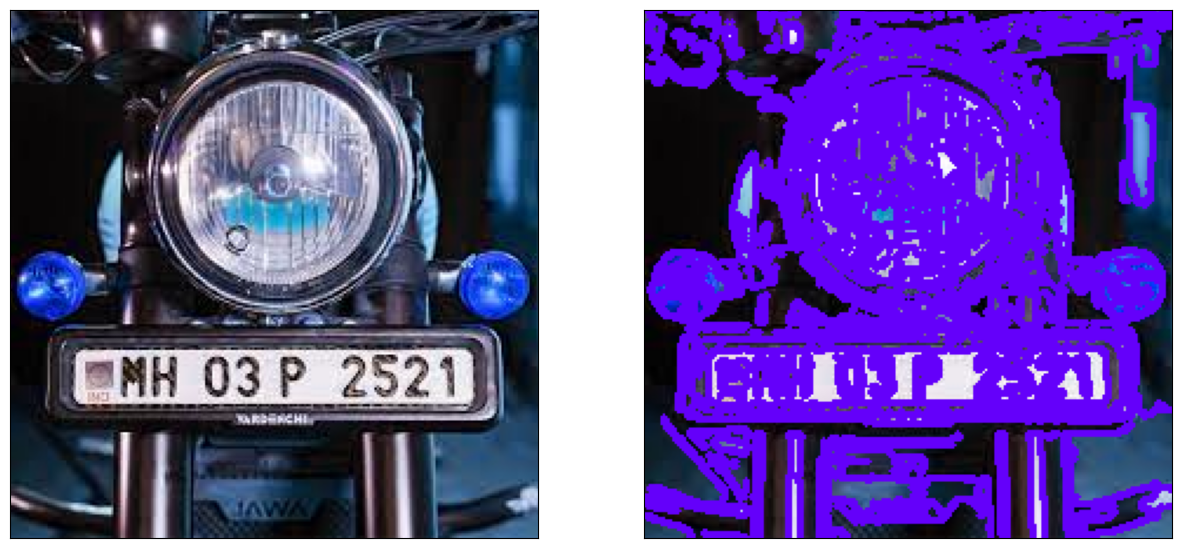

In [19]:
plot_images(img, image_copy)

In [20]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [21]:
image_copy = img.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (300,0,255),2)

In [22]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = img[y:y+h, x:x+w]
        break

cv2.imwrite("harshu.jpg", plate)

True

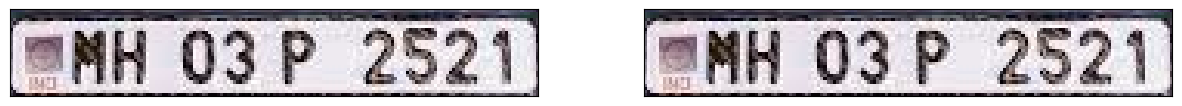

In [23]:
plot_images(plate, plate)

In [24]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (5,680 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [25]:
import pytesseract as pytess

In [26]:
text = pytesseract.image_to_string(plate, lang="eng")

In [27]:
print(text)

@™MH O3P 2521



In [ ]:
!pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=aeb15a674cb36766722185ba609959337f5274308de829884a47aba477b7fe6e
  Stored in directory: /root/.cache/pip/wheels/93/95/a9/c292c9dd8cadb8f2359f1670ff198a40d47167b0be3236e1c8
Successfully built langid


In [ ]:
import langid
 
 
L = (text)
 
for i in L:
     
    # Language detection
    print(langid.classify(i))

('en', 9.061840057373047)
('zh', 3.0182065963745117)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
('en', 9.061840057373047)
